In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/poolCount.csv')

# List of read count columns
read_count_columns = ['37(A1)', '37(A2)', '37(B1)', '37(B2)', '45(A1)', '45(A2)', '45(B1)', '45(B2)', '50(A1)', '50(A2)', '50(B1)', '50(B2)']

# Create empty DataFrames for filtered and removed rows
filtered_indices = set(df.index)
removed_indices = set()

# Function to filter the top fifth percentile and track removed rows
def filter_and_track(column):
    cutoff = column.quantile(0.95)
    removed = column > cutoff
    return removed

# Apply the filter to each read count column
for col in read_count_columns:
    removed = filter_and_track(df[col])
    filtered_indices = filtered_indices - set(df[removed].index)
    removed_indices = removed_indices | set(df[removed].index)

# Create filtered and removed DataFrames based on indices
filtered_rows = df.loc[filtered_indices]
removed_rows = df.loc[removed_indices]

# Save the filtered and removed DataFrames
filtered_rows.to_csv('filtered_file.csv', index=False)
removed_rows.to_csv('removed_file.csv', index=False)

print("Filtering complete. The filtered data is saved in 'filtered_file.csv' and the removed data is saved in 'removed_file.csv'.")


In [3]:
import pandas as pd

# Load the count file into a DataFrame
count_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/poolCount_filtered_file.txt'
df = pd.read_csv(count_file_path, sep='\t')

# Calculate the total counts for each replicate
df['Total_Count_37(A1)'] = df['37(A1)'].sum()
df['Total_Count_37(A2)'] = df['37(A2)'].sum()
df['Total_Count_37(B1)'] = df['37(B1)'].sum()
df['Total_Count_37(B2)'] = df['37(B2)'].sum()
df['Total_Count_45(A1)'] = df['45(A1)'].sum()
df['Total_Count_45(A2)'] = df['45(A2)'].sum()
df['Total_Count_45(B1)'] = df['45(B1)'].sum()
df['Total_Count_45(B2)'] = df['45(B2)'].sum()
df['Total_Count_50(A1)'] = df['50(A1)'].sum()
df['Total_Count_50(A2)'] = df['50(A2)'].sum()
df['Total_Count_50(B1)'] = df['50(B1)'].sum()
df['Total_Count_50(B2)'] = df['50(B2)'].sum()

# Normalize counts for each replicate by dividing by its own Total_Count
df['norm_37(A1)'] = df['37(A1)'] / df['Total_Count_37(A1)']
df['norm_37(A2)'] = df['37(A2)'] / df['Total_Count_37(A2)']
df['norm_37(B1)'] = df['37(B1)'] / df['Total_Count_37(B1)']
df['norm_37(B2)'] = df['37(B2)'] / df['Total_Count_37(B2)']
df['norm_45(A1)'] = df['45(A1)'] / df['Total_Count_45(A1)']
df['norm_45(A2)'] = df['45(A2)'] / df['Total_Count_45(A2)']
df['norm_45(B1)'] = df['45(B1)'] / df['Total_Count_45(B1)']
df['norm_45(B2)'] = df['45(B2)'] / df['Total_Count_45(B2)']
df['norm_50(A1)'] = df['50(A1)'] / df['Total_Count_50(A1)']
df['norm_50(A2)'] = df['50(A2)'] / df['Total_Count_50(A2)']
df['norm_50(B1)'] = df['50(B1)'] / df['Total_Count_50(B1)']
df['norm_50(B2)'] = df['50(B2)'] / df['Total_Count_50(B2)']
# Save the normalized count file
normalized_count_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.csv'
df.to_csv(normalized_count_file_path, index=False)


In [ ]:
to convert csv to txt

In [51]:
import pandas as pd

# Load the CSV file
csv_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.csv'
df = pd.read_csv(csv_file_path)

# Save the DataFrame to a text file (txt)
txt_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt'
df.to_csv(txt_file_path, sep='\t', index=False)


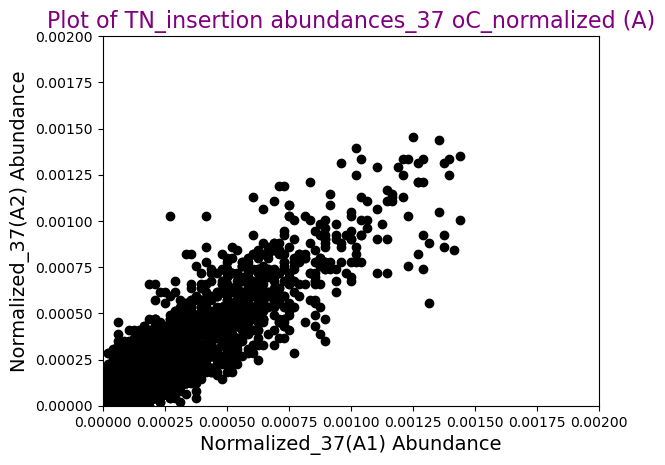

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_37(A1)'
y_column = 'norm_37(A2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_37(A1) Abundance', fontsize=14)
plt.ylabel('Normalized_37(A2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_37 oC_normalized (A)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.002)  # Adjust the range for the x-axis
plt.ylim(0, 0.002)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

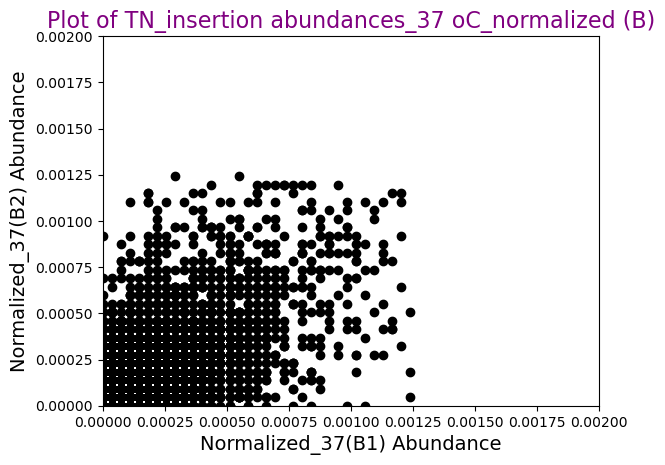

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_37(B1)'
y_column = 'norm_37(B2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_37(B1) Abundance', fontsize=14)
plt.ylabel('Normalized_37(B2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_37 oC_normalized (B)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.002)  # Adjust the range for the x-axis
plt.ylim(0, 0.002)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

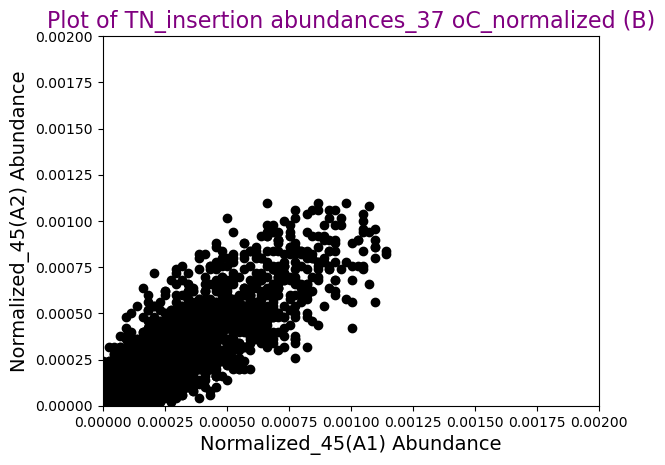

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_45(A1)'
y_column = 'norm_45(A2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_45(A1) Abundance', fontsize=14)
plt.ylabel('Normalized_45(A2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_45 oC_normalized (A)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.002)  # Adjust the range for the x-axis
plt.ylim(0, 0.002)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

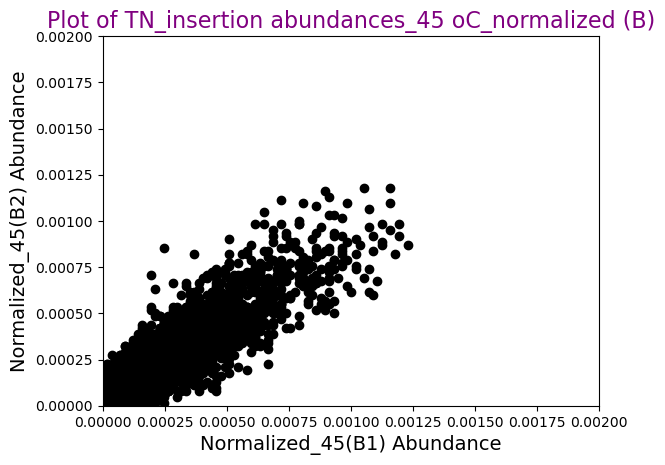

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_45(B1)'
y_column = 'norm_45(B2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_45(B1) Abundance', fontsize=14)
plt.ylabel('Normalized_45(B2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_45 oC_normalized (B)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.002)  # Adjust the range for the x-axis
plt.ylim(0, 0.002)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

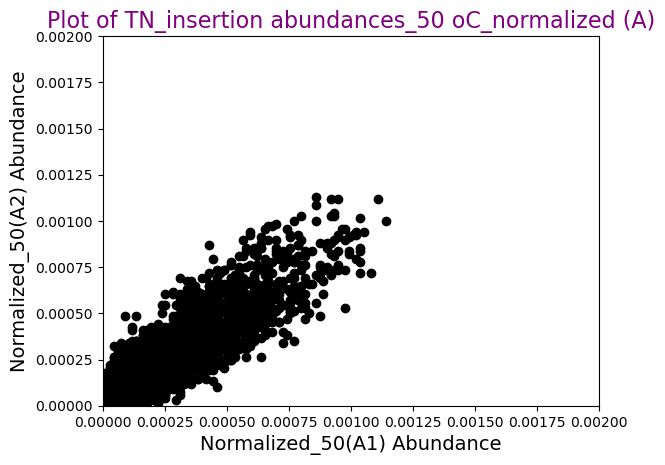

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_50(A1)'
y_column = 'norm_50(A2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_50(A1) Abundance', fontsize=14)
plt.ylabel('Normalized_50(A2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_50 oC_normalized (A)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.002)  # Adjust the range for the x-axis
plt.ylim(0, 0.002)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

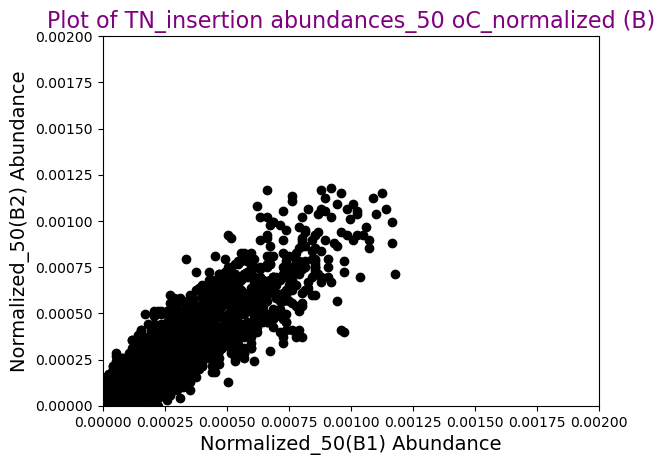

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_50(B1)'
y_column = 'norm_50(B2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_50(B1) Abundance', fontsize=14)
plt.ylabel('Normalized_50(B2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_50 oC_normalized (B)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.002)  # Adjust the range for the x-axis
plt.ylim(0, 0.002)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

### Plots of the individual replicates to check their agreements

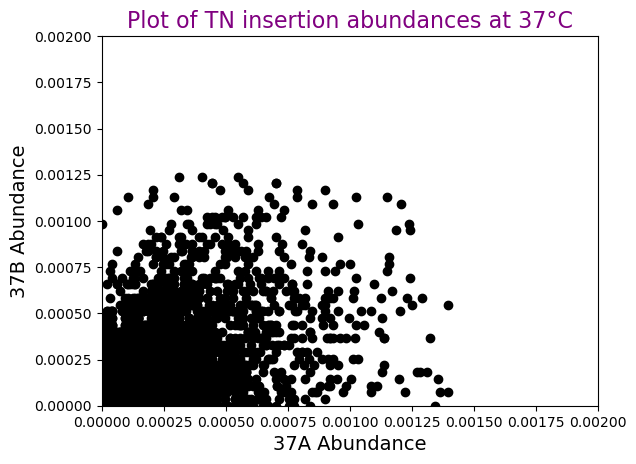

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['norm_37(A1)'] + df['norm_37(A2)']) / 2
y_column = (df['norm_37(B1)'] + df['norm_37(B1)']) / 2

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37A Abundance', fontsize=14)
plt.ylabel('37B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances at 37°C', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.00200)  # Adjust the range for the x-axis
plt.ylim(0, 0.0020)  # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

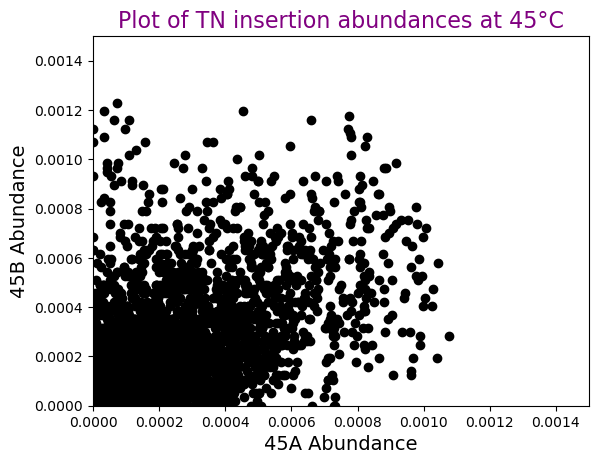

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['norm_45(A1)'] + df['norm_45(A2)']) / 2
y_column = (df['norm_45(B1)'] + df['norm_45(B1)']) / 2

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('45A Abundance', fontsize=14)
plt.ylabel('45B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances at 45°C', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0015)  # Adjust the range for the x-axis
plt.ylim(0, 0.0015)  # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

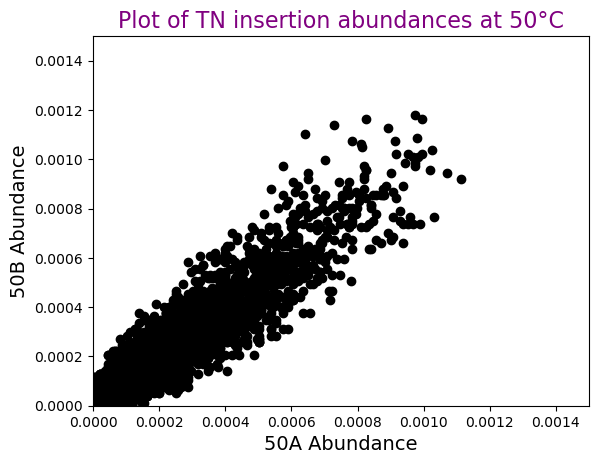

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['norm_50(A1)'] + df['norm_50(A2)']) / 2
y_column = (df['norm_50(B1)'] + df['norm_50(B1)']) / 2

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('50A Abundance', fontsize=14)
plt.ylabel('50B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances at 50°C', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0015)  # Adjust the range for the x-axis
plt.ylim(0, 0.0015)  # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

### Plots of 37 oC against 45 oC and 37 oC against 50 oC

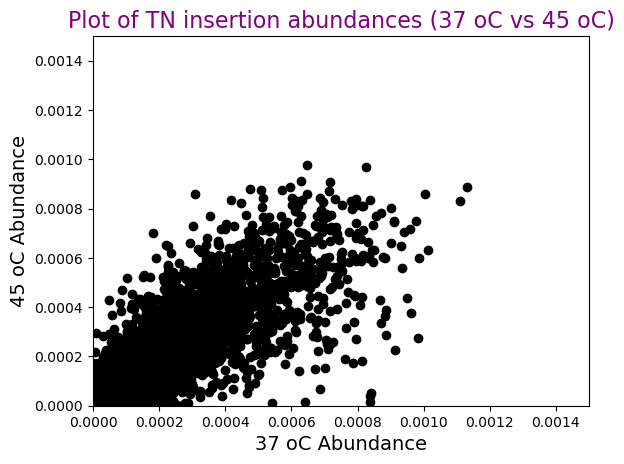

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['norm_37(A1)'] + df['norm_37(A2)'] + df['norm_37(B1)'] + df['norm_37(B2)']) / 4
y_column = (df['norm_45(A1)'] + df['norm_45(A2)'] + df['norm_45(B1)'] + df['norm_45(B2)']) / 4

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC Abundance', fontsize=14)
plt.ylabel('45 oC Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 oC vs 45 oC)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0015)  # Adjust the range for the x-axis
plt.ylim(0, 0.0015) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


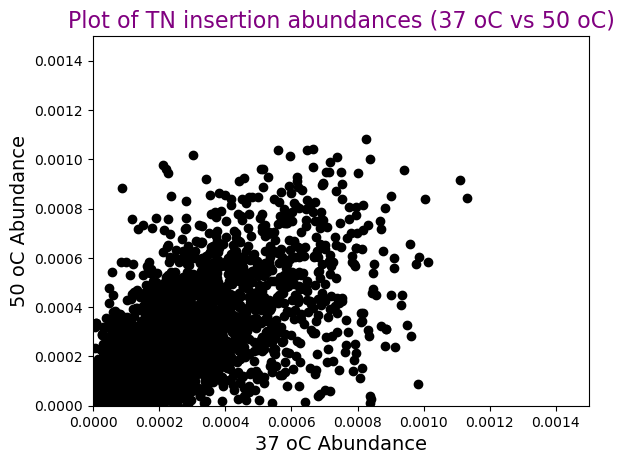

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['norm_37(A1)'] + df['norm_37(A2)'] + df['norm_37(B1)'] + df['norm_37(B2)']) / 4
y_column = (df['norm_50(A1)'] + df['norm_50(A2)'] + df['norm_50(B1)'] + df['norm_50(B2)']) / 4

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC Abundance', fontsize=14)
plt.ylabel('50 oC Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 oC vs 50 oC)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0015)  # Adjust the range for the x-axis
plt.ylim(0, 0.0015) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


### to annotate

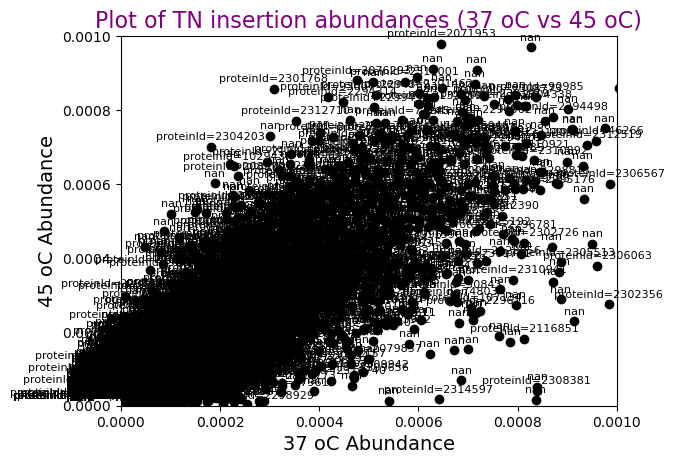

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['norm_37(A1)'] + df['norm_37(A2)'] + df['norm_37(B1)'] + df['norm_37(B2)']) / 4
y_column = (df['norm_45(A1)'] + df['norm_45(A2)'] + df['norm_45(B1)'] + df['norm_45(B2)']) / 4

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC Abundance', fontsize=14)
plt.ylabel('45 oC Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 oC vs 45 oC)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.001)  # Adjust the range for the x-axis
plt.ylim(0, 0.001)  # Adjust the range for the y-axis

# Annotate each point with the gene name
for i, gene in enumerate(df['gene']):
    plt.annotate(gene, (x_column[i], y_column[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


### To filter with one percentile

In [48]:
import pandas as pd

# Load the data
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/poolCount.csv')

# List of read count columns
read_count_columns = ['37(A1)', '37(A2)', '37(B1)', '37(B2)', '45(A1)', '45(A2)', '45(B1)', '45(B2)', '50(A1)', '50(A2)', '50(B1)', '50(B2)']

# Create empty DataFrames for filtered and removed rows
filtered_indices = set(df.index)
removed_indices = set()

# Function to filter the top fifth percentile and track removed rows
def filter_and_track(column):
    cutoff = column.quantile(0.99)
    removed = column > cutoff
    return removed

# Apply the filter to each read count column
for col in read_count_columns:
    removed = filter_and_track(df[col])
    filtered_indices = filtered_indices - set(df[removed].index)
    removed_indices = removed_indices | set(df[removed].index)

# Create filtered and removed DataFrames based on indices
filtered_rows = df.loc[filtered_indices]
removed_rows = df.loc[removed_indices]

# Save the filtered and removed DataFrames
filtered_rows.to_csv('poolCount_filtered_file_with_one_percentile.csv', index=False)
removed_rows.to_csv('removed_file_with_one_percentile.csv', index=False)



print("Filtering complete. The filtered data is saved in 'filtered_file.csv' and the removed data is saved in 'removed_file.csv'.")


Filtering complete. The filtered data is saved in 'filtered_file.csv' and the removed data is saved in 'removed_file.csv'.


/tmp/ipykernel_1684348/1406311853.py:26: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/tmp/ipykernel_1684348/1406311853.py:27: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



In [50]:
import pandas as pd

# Load the count file into a DataFrame
count_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/poolCount_filtered_file_with_one_percentile.txt'
df = pd.read_csv(count_file_path, sep='\t')

# Calculate the total counts for each replicate
df['Total_Count_37(A1)'] = df['37(A1)'].sum()
df['Total_Count_37(A2)'] = df['37(A2)'].sum()
df['Total_Count_37(B1)'] = df['37(B1)'].sum()
df['Total_Count_37(B2)'] = df['37(B2)'].sum()
df['Total_Count_45(A1)'] = df['45(A1)'].sum()
df['Total_Count_45(A2)'] = df['45(A2)'].sum()
df['Total_Count_45(B1)'] = df['45(B1)'].sum()
df['Total_Count_45(B2)'] = df['45(B2)'].sum()
df['Total_Count_50(A1)'] = df['50(A1)'].sum()
df['Total_Count_50(A2)'] = df['50(A2)'].sum()
df['Total_Count_50(B1)'] = df['50(B1)'].sum()
df['Total_Count_50(B2)'] = df['50(B2)'].sum()

# Normalize counts for each replicate by dividing by its own Total_Count
df['norm_37(A1)'] = df['37(A1)'] / df['Total_Count_37(A1)']
df['norm_37(A2)'] = df['37(A2)'] / df['Total_Count_37(A2)']
df['norm_37(B1)'] = df['37(B1)'] / df['Total_Count_37(B1)']
df['norm_37(B2)'] = df['37(B2)'] / df['Total_Count_37(B2)']
df['norm_45(A1)'] = df['45(A1)'] / df['Total_Count_45(A1)']
df['norm_45(A2)'] = df['45(A2)'] / df['Total_Count_45(A2)']
df['norm_45(B1)'] = df['45(B1)'] / df['Total_Count_45(B1)']
df['norm_45(B2)'] = df['45(B2)'] / df['Total_Count_45(B2)']
df['norm_50(A1)'] = df['50(A1)'] / df['Total_Count_50(A1)']
df['norm_50(A2)'] = df['50(A2)'] / df['Total_Count_50(A2)']
df['norm_50(B1)'] = df['50(B1)'] / df['Total_Count_50(B1)']
df['norm_50(B2)'] = df['50(B2)'] / df['Total_Count_50(B2)']
# Save the normalized count file
normalized_count_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.csv'
df.to_csv(normalized_count_file_path, index=False)


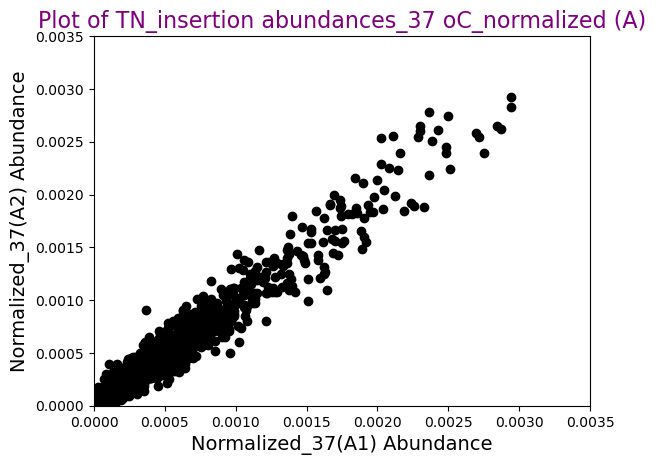

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_37(A1)'
y_column = 'norm_37(A2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_37(A1) Abundance', fontsize=14)
plt.ylabel('Normalized_37(A2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_37 oC_normalized (A)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranes
plt.xlim(0, 0.0035)  # Adjust the range for the x-axis
plt.ylim(0, 0.0035)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

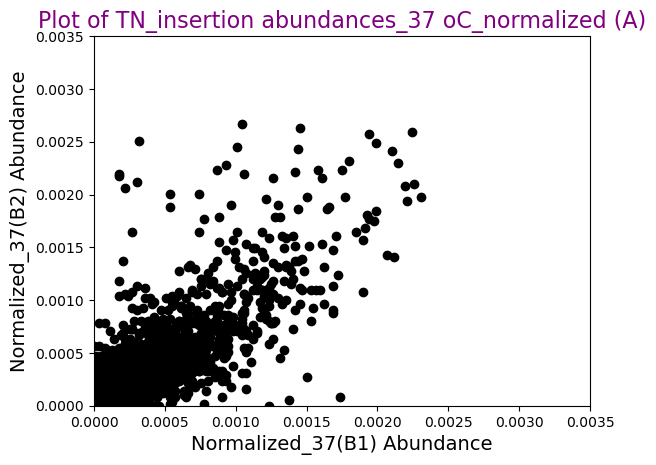

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_37(B1)'
y_column = 'norm_37(B2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_37(B1) Abundance', fontsize=14)
plt.ylabel('Normalized_37(B2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_37 oC_normalized (A)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0035)  # Adjust the range for the x-axis
plt.ylim(0, 0.0035)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

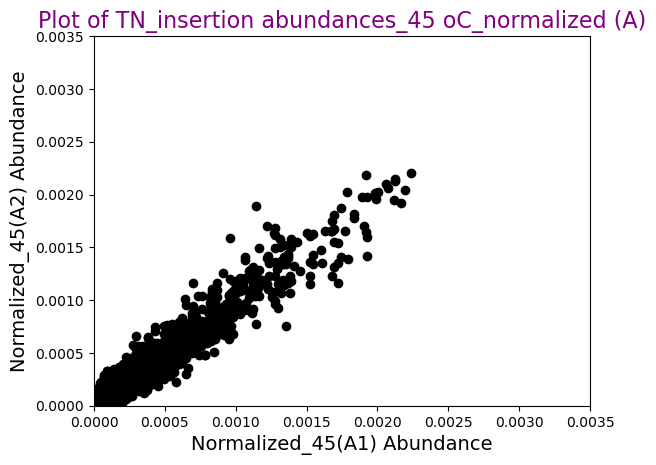

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_45(A1)'
y_column = 'norm_45(A2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_45(A1) Abundance', fontsize=14)
plt.ylabel('Normalized_45(A2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_45 oC_normalized (A)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0035)  # Adjust the range for the x-axis
plt.ylim(0, 0.0035)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

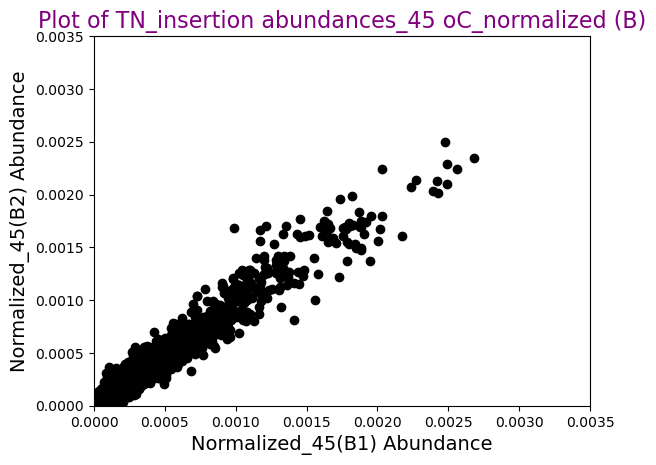

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_45(B1)'
y_column = 'norm_45(B2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_45(B1) Abundance', fontsize=14)
plt.ylabel('Normalized_45(B2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_45 oC_normalized (B)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0035)  # Adjust the range for the x-axis
plt.ylim(0, 0.0035)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

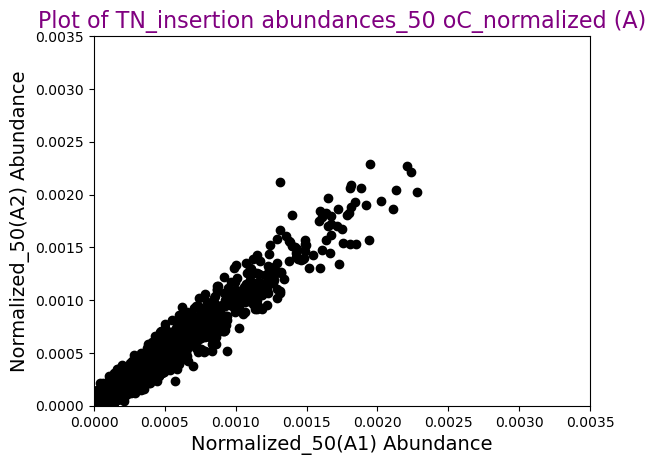

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Select the columns you want to use for the scatter plot
x_column = 'norm_50(A1)'
y_column = 'norm_50(A2)'

# Create a scatter plot using the selected columns
plt.scatter(df[x_column], df[y_column], color='black')
plt.xlabel('Normalized_50(A1) Abundance', fontsize=14)
plt.ylabel('Normalized_50(A2) Abundance', fontsize=14)
plt.title('Plot of TN_insertion abundances_50 oC_normalized (A)', fontsize=16, color='purple')
# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0035)  # Adjust the range for the x-axis
plt.ylim(0, 0.0035)  # Adjust the range for the y-axis

# Optionally, add grid lines
#plt.grid(True)
#plt.grid(True)  # Optionally, add grid lines
#plt.savefig("/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/histogram_plots/fitness_of_TN_abundances_01_09_2024_37oC_Normalized_1.png", dpi=600, bbox_inches='tight')
plt.show()

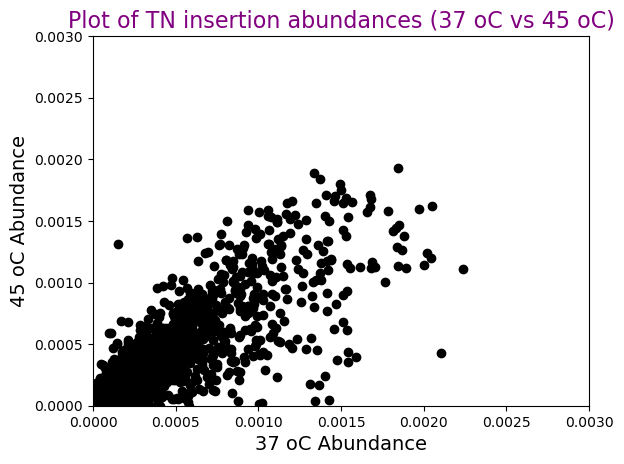

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['norm_37(A1)'] + df['norm_37(A2)'] + df['norm_37(B1)'] + df['norm_37(B2)']) / 4
y_column = (df['norm_45(A1)'] + df['norm_45(A2)'] + df['norm_45(B1)'] + df['norm_45(B2)']) / 4

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC Abundance', fontsize=14)
plt.ylabel('45 oC Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 oC vs 45 oC)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0030)  # Adjust the range for the x-axis
plt.ylim(0, 0.0030) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


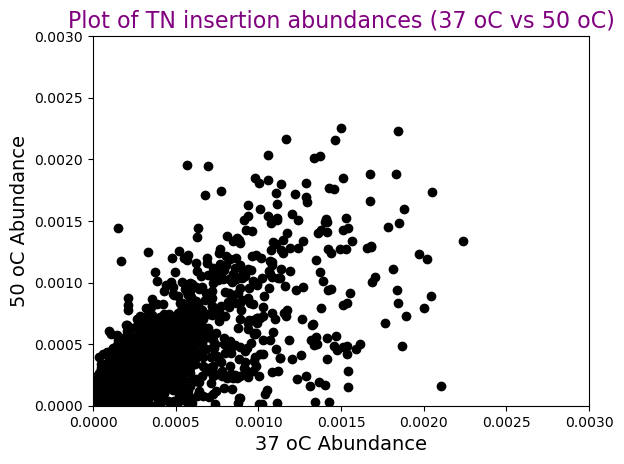

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['norm_37(A1)'] + df['norm_37(A2)'] + df['norm_37(B1)'] + df['norm_37(B2)']) / 4
y_column = (df['norm_50(A1)'] + df['norm_50(A2)'] + df['norm_50(B1)'] + df['norm_50(B2)']) / 4

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC Abundance', fontsize=14)
plt.ylabel('50 oC Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 oC vs 50 oC)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0030)  # Adjust the range for the x-axis
plt.ylim(0, 0.0030) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


## to increase the reads for a given insert

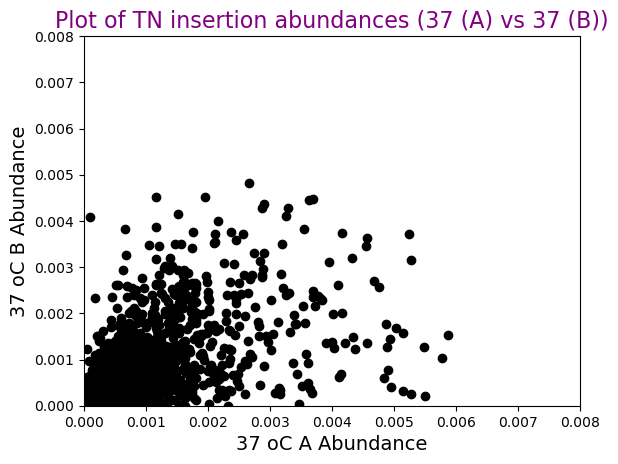

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = df['norm_37(A1)'] + df['norm_37(A2)'] 
y_column = df['norm_37(B1)'] + df['norm_37(B2)']

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC A Abundance', fontsize=14)
plt.ylabel('37 oC B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 (A) vs 37 (B))', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.008)  # Adjust the range for the x-axis
plt.ylim(0, 0.008) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


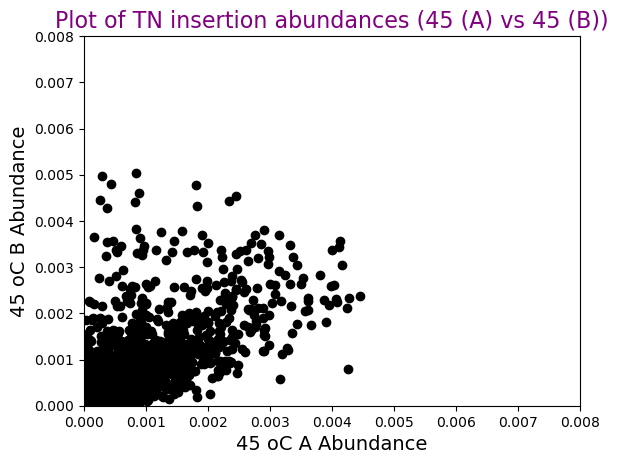

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = df['norm_45(A1)'] + df['norm_45(A2)'] 
y_column = df['norm_45(B1)'] + df['norm_45(B2)']

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('45 oC A Abundance', fontsize=14)
plt.ylabel('45 oC B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (45 (A) vs 45 (B))', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.008)  # Adjust the range for the x-axis
plt.ylim(0, 0.008) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


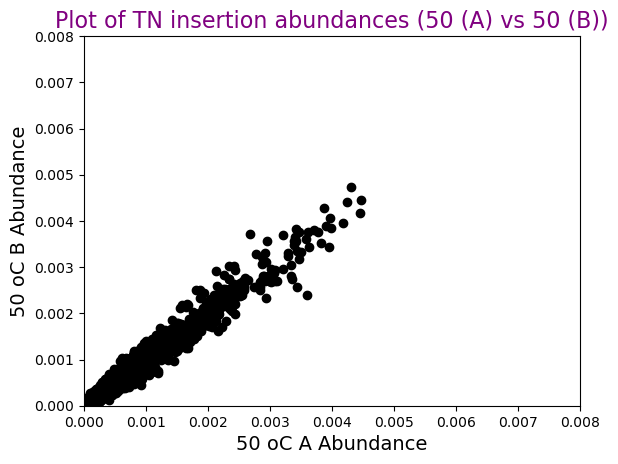

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = df['norm_50(A1)'] + df['norm_50(A2)'] 
y_column = df['norm_50(B1)'] + df['norm_50(B2)']

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('50 oC A Abundance', fontsize=14)
plt.ylabel('50 oC B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (50 (A) vs 50 (B))', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.008)  # Adjust the range for the x-axis
plt.ylim(0, 0.008) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


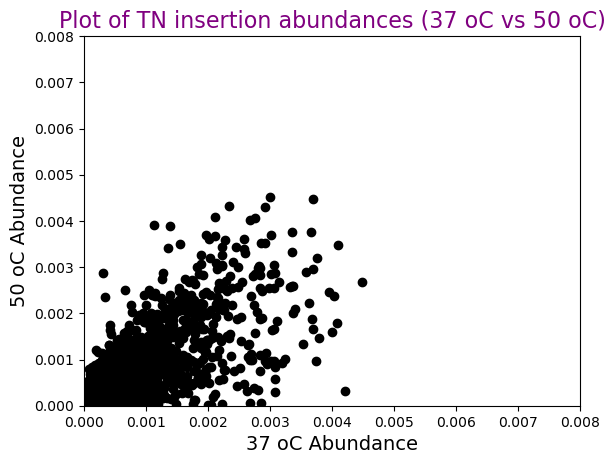

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['norm_37(A1)'] + df['norm_37(A2)'] + df['norm_37(B1)'] + df['norm_37(B2)']) / 2
y_column = (df['norm_50(A1)'] + df['norm_50(A2)'] + df['norm_50(B1)'] + df['norm_50(B2)']) / 2

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC Abundance', fontsize=14)
plt.ylabel('50 oC Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 oC vs 50 oC)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.008)  # Adjust the range for the x-axis
plt.ylim(0, 0.008) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


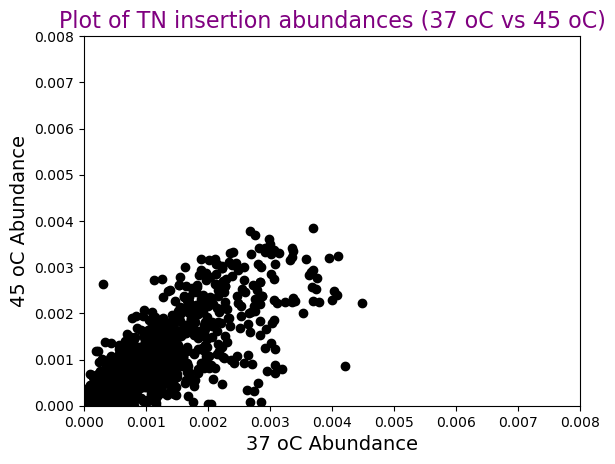

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['norm_37(A1)'] + df['norm_37(A2)'] + df['norm_37(B1)'] + df['norm_37(B2)']) / 2
y_column = (df['norm_45(A1)'] + df['norm_45(A2)'] + df['norm_45(B1)'] + df['norm_45(B2)']) / 2

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC Abundance', fontsize=14)
plt.ylabel('45 oC Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 oC vs 45 oC)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.008)  # Adjust the range for the x-axis
plt.ylim(0, 0.008) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


## To sum first before filtering off based on top one percentile

In [15]:
import pandas as pd

# Load the data
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/poolCount.csv')

# List of read count column pairs to sum with new column names
read_count_column_pairs = [
    ('37(A1)', '37(A2)', '37(A)_summed'),
    ('37(B1)', '37(B2)', '37(B)_summed'),
    ('45(A1)', '45(A2)', '45(A)_summed'),
    ('45(B1)', '45(B2)', '45(B)_summed'),
    ('50(A1)', '50(A2)', '50(A)_summed'),
    ('50(B1)', '50(B2)', '50(B)_summed')
]

# Create new columns for the sums of the pairs
for col1, col2, new_col in read_count_column_pairs:
    df[new_col] = df[col1] + df[col2]

# List of new summed columns
summed_columns = [new_col for _, _, new_col in read_count_column_pairs]

# Create empty sets for filtered and removed indices
filtered_indices = set(df.index)
removed_indices = set()

# Function to filter the top one percentile and track removed rows
def filter_and_track(column):
    cutoff = column.quantile(0.99)  # Top one percentile
    removed = column > cutoff
    return removed

# Apply the filter to each summed column
for col in summed_columns:
    removed = filter_and_track(df[col])
    filtered_indices = filtered_indices - set(df[removed].index)
    removed_indices = removed_indices | set(df[removed].index)

# Create filtered and removed DataFrames based on indices
filtered_rows = df.loc[list(filtered_indices)]
removed_rows = df.loc[list(removed_indices)]

# Save the filtered and removed DataFrames
filtered_rows.to_csv('summed_filtered_file_one_percentile.csv', index=False)
removed_rows.to_csv('summed_removed_file_one_percentile.csv', index=False)

print("Filtering complete. The filtered data is saved in 'summed_filtered_file.csv' and the removed data is saved in 'summed_removed_file.csv'.")


Filtering complete. The filtered data is saved in 'summed_filtered_file.csv' and the removed data is saved in 'summed_removed_file.csv'.


In [18]:
import pandas as pd

# Load the CSV file
csv_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_summed_filtered_file_one_percentile.csv'
df = pd.read_csv(csv_file_path)

# Save the DataFrame to a text file (txt)
txt_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_summed_filtered_file_one_percentile.txt'
df.to_csv(txt_file_path, sep='\t', index=False)

In [17]:
import pandas as pd

# Load the count file into a DataFrame
count_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/summed_filtered_file_one_percentile.txt'
df = pd.read_csv(count_file_path, sep='\t')

# Calculate the total counts for each replicate
df['Total_Count_37(A)_summed'] = df['37(A)_summed'].sum()
df['Total_Count_37(B)_summed'] = df['37(B)_summed'].sum()
df['Total_Count_45(A)_summed'] = df['45(A)_summed'].sum()
df['Total_Count_45(B)_summed'] = df['45(B)_summed'].sum()
df['Total_Count_50(A)_summed'] = df['50(A)_summed'].sum()
df['Total_Count_50(B)_summed'] = df['50(B)_summed'].sum()


# Normalize counts for each replicate by dividing by its own Total_Count
df['norm_37(A)_summed'] = df['37(A)_summed'] / df['Total_Count_37(A)_summed']
df['norm_37(B)_summed'] = df['37(B)_summed'] / df['Total_Count_37(B)_summed']
df['norm_45(A)_summed'] = df['45(A)_summed'] / df['Total_Count_45(A)_summed']
df['norm_45(B)_summed'] = df['45(B)_summed'] / df['Total_Count_45(B)_summed']
df['norm_50(A)_summed'] = df['50(A)_summed'] / df['Total_Count_50(A)_summed']
df['norm_50(B)_summed'] = df['50(B)_summed'] / df['Total_Count_50(B)_summed']
# Save the normalized count file
normalized_count_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_summed_filtered_file_one_percentile.csv'
df.to_csv(normalized_count_file_path, index=False)


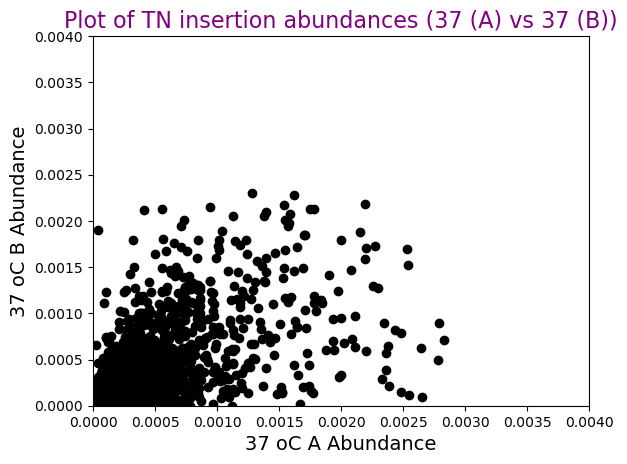

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_summed_filtered_file_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = df['norm_37(A)_summed'] 
y_column = df['norm_37(B)_summed']

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC A Abundance', fontsize=14)
plt.ylabel('37 oC B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 (A) vs 37 (B))', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.004)  # Adjust the range for the x-axis
plt.ylim(0, 0.004) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


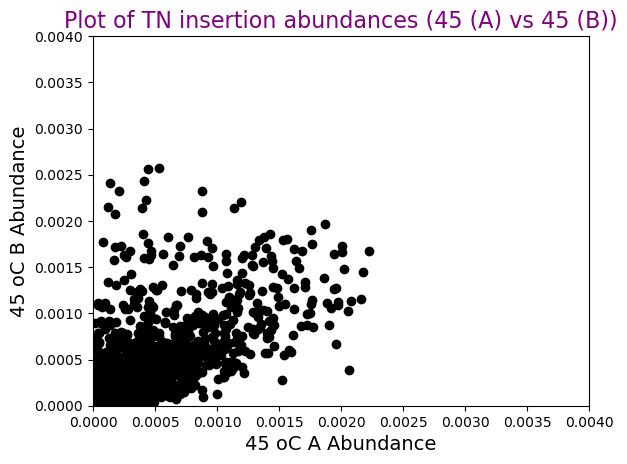

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_summed_filtered_file_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = df['norm_45(A)_summed'] 
y_column = df['norm_45(B)_summed']

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('45 oC A Abundance', fontsize=14)
plt.ylabel('45 oC B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (45 (A) vs 45 (B))', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.004)  # Adjust the range for the x-axis
plt.ylim(0, 0.004) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


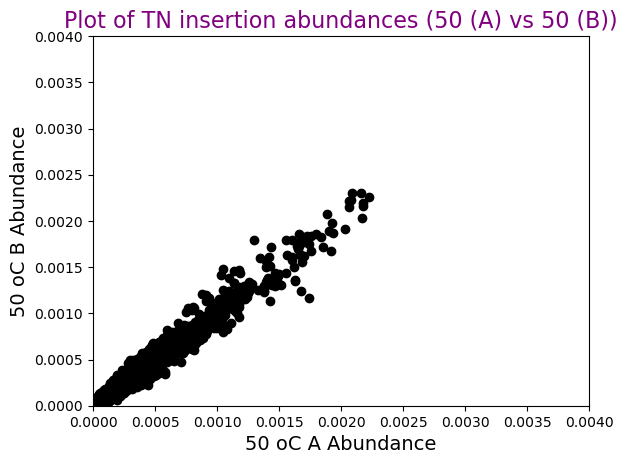

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_06_12_2024/to_filter_the_pool_countfile_before_normalization/normalized_summed_filtered_file_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = df['norm_50(A)_summed'] 
y_column = df['norm_50(B)_summed']

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('50 oC A Abundance', fontsize=14)
plt.ylabel('50 oC B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (50 (A) vs 50 (B))', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.004)  # Adjust the range for the x-axis
plt.ylim(0, 0.004) # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


## To fetch upstream and downstream sequences from NCBI

In [7]:
#always run this since the server couldnt read directory with the blast package from the local 
%env PATH=$PATH/auto/sahara/namib/home/shollyt22/anaconda3/lib/python3.9/site-packages/:/usr2/people/shollyt22/anaconda3/bin:/usr/lib64/qt-3.3/bin:/usr/condabin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/usr2/people/kayleeec/bin/ncbi-blast-2.13.0+/bin:/auto/sahara/namib/home/shollyt22/anaconda3/lib/python3.9/site-packages:/usr2/people/kayleeec/bin/ncbi-blast-2.13.0+/bin:/auto/sahara/namib/home/shollyt22/anaconda3/lib/python3.9/site-packages:/usr2/people/kayleeec/bin/ncbi-blast-2.13.0+/bin:/auto/sahara/namib/home/shollyt22/anaconda3/lib/python3.9/site-packages/

env: PATH=$PATH/auto/sahara/namib/home/shollyt22/anaconda3/lib/python3.9/site-packages/:/usr2/people/shollyt22/anaconda3/bin:/usr/lib64/qt-3.3/bin:/usr/condabin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/usr2/people/kayleeec/bin/ncbi-blast-2.13.0+/bin:/auto/sahara/namib/home/shollyt22/anaconda3/lib/python3.9/site-packages:/usr2/people/kayleeec/bin/ncbi-blast-2.13.0+/bin:/auto/sahara/namib/home/shollyt22/anaconda3/lib/python3.9/site-packages:/usr2/people/kayleeec/bin/ncbi-blast-2.13.0+/bin:/auto/sahara/namib/home/shollyt22/anaconda3/lib/python3.9/site-packages/


In [12]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [19]:
from Bio import Entrez

# Set up Entrez email
Entrez.email = "akintayo@icgeb.res.in"

# Test a simple Entrez query to ensure connectivity
def test_entrez_query():
    try:
        handle = Entrez.egquery(term="Thermothelomyces thermophilus")
        record = Entrez.read(handle)
        handle.close()
        return record
    except Exception as e:
        print(f"Error performing Entrez query: {e}")
        return None

query_result = test_entrez_query()

if query_result:
    print(query_result)
else:
    print("Failed to perform Entrez query.")


Error performing Entrez query: HTTP Error 400: Bad Request
Failed to perform Entrez query.
